# Bernstein Vazirani algorithm
Bernstein-Vazirani algorithm, first introduced in [Quantum Complexity Theory by Ethan Bernstein and Umesh Vazirani](https://epubs.siam.org/doi/10.1137/S0097539796300921), can be seen as an extension of the Deutsch-Jozsa algorithm. It showed that there can be advantages in using a quantum computer as a computational tool for more complex problems than the Deutsch-Jozsa problem.

### The Bernstein-Vazirani Problem <a id='bvproblem'> </a>

We are given a black-box function $f$, which takes as input a string of bits ($x$), and returns either $0$ or $1$, that is:
$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1  $$ 

The function is guaranteed to return the bitwise product of the input with some string, $s$. In other words, given an input $x$, $f(x) = s \cdot x \, \text{(mod 2)}$. We are expected to find $s$. 

### The Qlasskit implementation of Bernstein Vazirani Algorithm

Defining Oracle with secret string =`14` which binary equivalent is `1110`

In [1]:
from qlasskit import qlassf, Qint, Qint2,Qint4

@qlassf
def oracle(x: Qint[4]) -> bool:
    s=Qint4(14)
    return ((x[0]&s[0])^(x[1]&s[1])^(x[2]&s[2])^(x[3]&s[3]))
    

Printing the circuit formed in Qiskit draw format

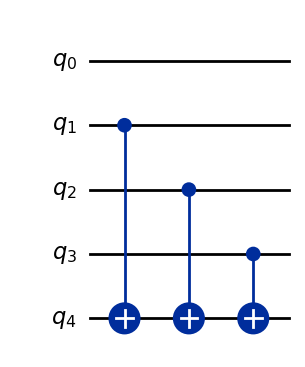

In [2]:
oracle.export("qiskit").draw("mpl")

Using the predefined `BernsteinVazirani` algorithm function and passing the oracle in the function

In [3]:
from qlasskit.algorithms import BernsteinVazirani

q_algo = BernsteinVazirani(oracle)

Final Circuit with oracle and `BernsteinVazirani` applied to it

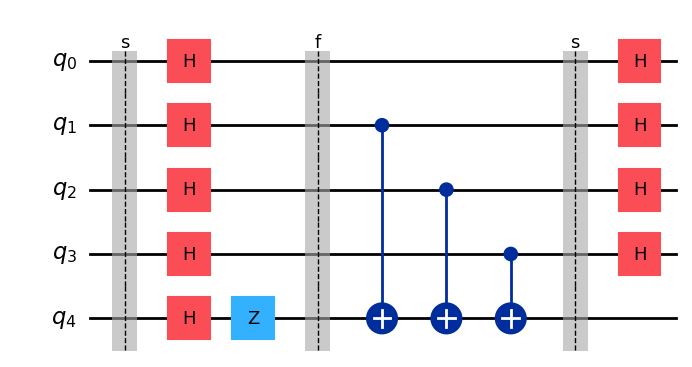

In [4]:
qc = q_algo.export("qiskit")
qc.draw("mpl")

Measuring and checking the results by giving `1024` shots the circuit formed. 

In [5]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

qc.measure_all()
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts(qc)

counts_readable = q_algo.decode_output(counts)
print(counts_readable)


{'0111': 1024}


Plotting the histogram from results `counts_readable`

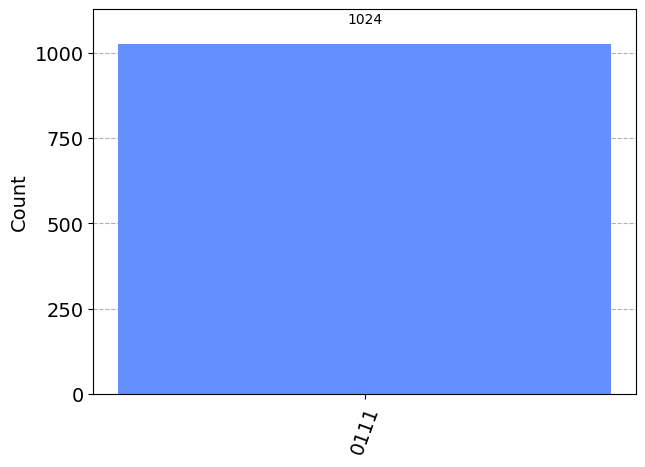

In [6]:
plot_histogram(counts_readable)